## Summer Olympics Medals (1976-2008)

This dataset is a list of all the medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period. This dataset is intended for beginners so that they can get a taste of advanced Excel functions which is perhaps one of the key skills required to be a great data scientist. I too got my hands dirty with the dataset and played with some advanced Excel functions. Further, this dataset can also be used for a predictive model as to which country is likely to fetch the highest number of gold in a particular sports category (just an example), etc.

The file contains 11 columns which include information about each and every medal awarded between the period of 1976-2008 in the Summer Olympics. The athlete's name along with his country, gender, discipline in which he/she won and the event name is included in the dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv


### importing necessary libraries...

In [2]:
import pandas as pd
import sys
import math
import numpy.random as nr
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### importing Dataset...

In [3]:
df = pd.read_csv('../input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv',  encoding = "ISO-8859-1")

In [4]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


### Checking the concise summary of the dataset...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


### Checking the shape of the dataset...

In [6]:
df.shape

(15433, 11)

dataset contains 15433 Rows and 11 Columns...

### checking the null values in the dataset...

In [7]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

There are null values present in the dataset...
we will treat the null values at the time of modelling...

### Number of unique values

In [8]:
for vars in df.columns:
  print(f'no. of unique values in {vars} : {df[vars].nunique()}\n')

no. of unique values in City : 9

no. of unique values in Year : 9

no. of unique values in Sport : 28

no. of unique values in Discipline : 41

no. of unique values in Event : 293

no. of unique values in Athlete : 11337

no. of unique values in Gender : 2

no. of unique values in Country_Code : 128

no. of unique values in Country : 127

no. of unique values in Event_gender : 3

no. of unique values in Medal : 3



### Exploratory Data Analysis

Question: How many medals are won per olympic Year...?

In [9]:
year_wise_total_medal=df.groupby('Year')['Medal'].count()
year_wise_total_medal

Year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: Medal, dtype: int64

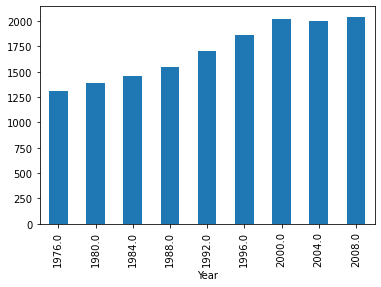

In [10]:
year_wise_total_medal.plot(kind='bar');

This visualization shows that year 2008 has highest number of medal followed by 2000

Question: How many Gold, Silver and Bronze medals are won per olympic Year...?

In [11]:
year_wise_medal=df.groupby('Year')['Medal'].value_counts()
year_wise_medal

Year    Medal 
1976.0  Bronze    447
        Gold      429
        Silver    429
1980.0  Bronze    472
        Gold      460
        Silver    455
1984.0  Bronze    500
        Gold      483
        Silver    476
1988.0  Bronze    535
        Gold      506
        Silver    505
1992.0  Bronze    596
        Gold      558
        Silver    551
1996.0  Bronze    634
        Gold      615
        Silver    610
2000.0  Bronze    685
        Silver    667
        Gold      663
2004.0  Bronze    679
        Silver    660
        Gold      659
2008.0  Bronze    710
        Gold      669
        Silver    663
Name: Medal, dtype: int64

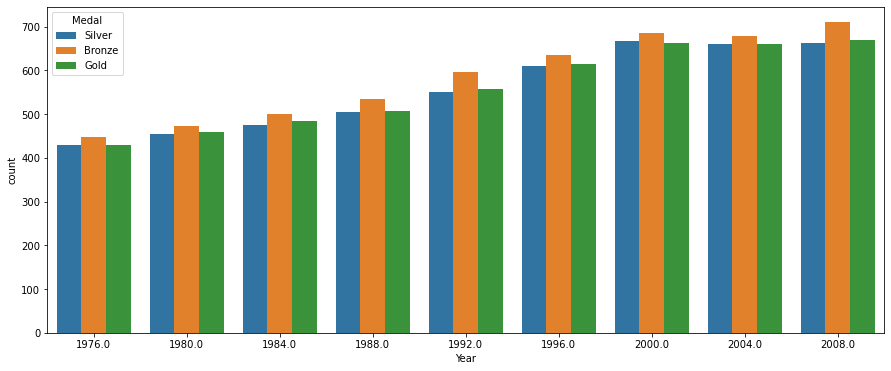

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(df['Year'], hue=df['Medal']);

In Year 2008 won the most Bronze--710, Gold--669, Silver--663...

Question: How many medals are won based on Gender per olympic Year...?

In [13]:
year_wise_participants=df.groupby('Year')['Gender'].value_counts()
year_wise_participants

Year    Gender
1976.0  Men        924
        Women      381
1980.0  Men        958
        Women      429
1984.0  Men        973
        Women      486
1988.0  Men       1011
        Women      535
1992.0  Men       1105
        Women      600
1996.0  Men       1082
        Women      777
2000.0  Men       1126
        Women      889
2004.0  Men       1099
        Women      899
2008.0  Men       1110
        Women      932
Name: Gender, dtype: int64

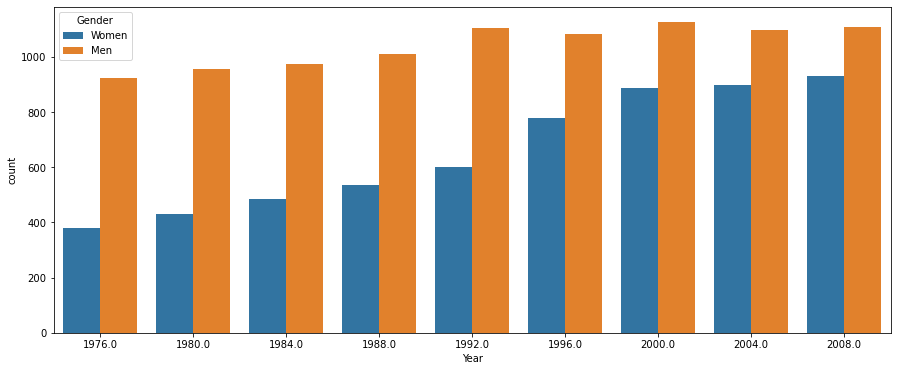

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(df['Year'], hue=df['Gender']);

The participation of women is less as compared to men but as the time progresses the women participation increase that shows the eqaulity in sports also.

Question: Which country won the most medals in total...?

In [15]:
medals_by_country=df.groupby('Country')['Medal'].count().sort_values(ascending=False)[:20]
medals_by_country

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Korea, South       454
France             449
Netherlands        428
Japan              388
Hungary            368
Cuba               349
West Germany       345
Spain              328
Brazil             318
Canada             304
Name: Medal, dtype: int64

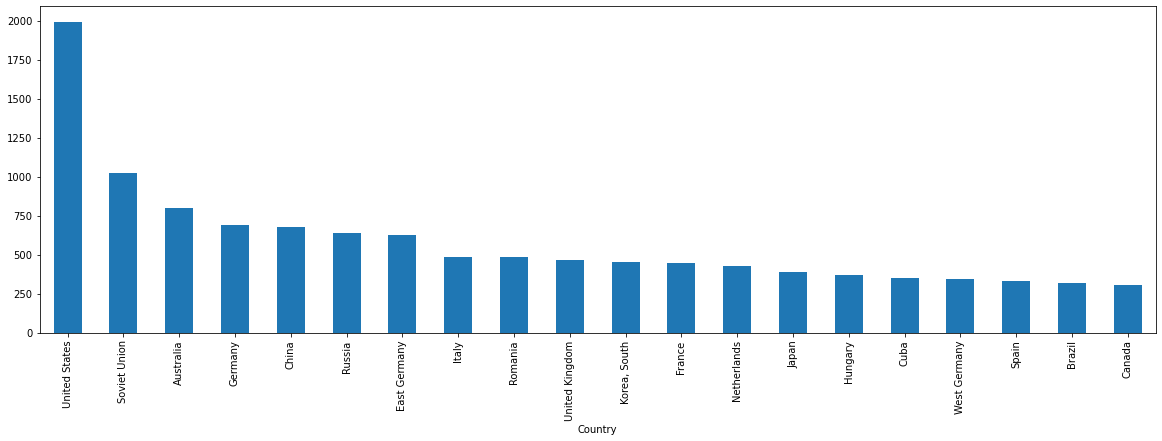

In [16]:
medals_by_country.plot(kind='bar', figsize=(20,6));

Top 15 countries with maximum number of medals in summer olympics. Usa is at the top with 1992 medals which is followed by Soviet Union with 1021 medals.

Lets Explore above chart for top 7 countries...

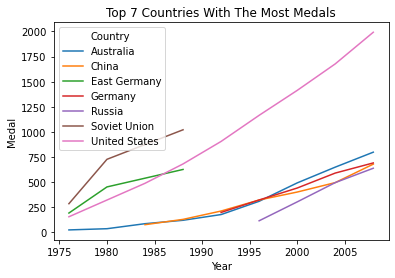

In [17]:
fil1=df['Country']=='United States'
fil2=df['Country']=='Australia'
fil3=df['Country']=='Soviet Union'
fil4=df['Country']=='Germany'
fil5=df['Country']=='China'
fil6=df['Country']=='Russia'
fil7=df['Country']=='East Germany'
df1=df.where(fil1 | fil2| fil3 | fil4 | fil5 | fil6 | fil7).dropna()
df1=df1[['Year','Country','Medal']]
df2=df1.groupby(['Country','Year']).agg('count').groupby('Country').cumsum().reset_index()
sns.lineplot(data=df2,x='Year',y='Medal',hue='Country')
plt.title('Top 7 Countries With The Most Medals')
plt.show()

Here we can see that USA continuosly progressing per year in the medal count.

And we can clealy see that until 1988 Soviet Union won after that dissolution of the Soviet Union happened...
and same for the East Germany...

We can see the Russia joined the race which was part of Soviet Union...

Question: Which Sports won the most medals...?

In [18]:
medals_in_sports=df.groupby('Sport')['Medal'].count().sort_values(ascending=False)
medals_in_sports

Sport
Aquatics             2210
Athletics            1523
Rowing               1377
Hockey                817
Gymnastics            783
Handball              780
Volleyball            695
Canoe / Kayak         672
Football              669
Basketball            646
Fencing               606
Wrestling             533
Cycling               483
Equestrian            423
Sailing               417
Boxing                416
Judo                  396
Shooting              345
Baseball              335
Weightlifting         311
Softball              180
Archery               162
Badminton             120
Table Tennis          120
Tennis                118
Modern Pentathlon      81
Taekwondo              80
Triathlon              18
Name: Medal, dtype: int64

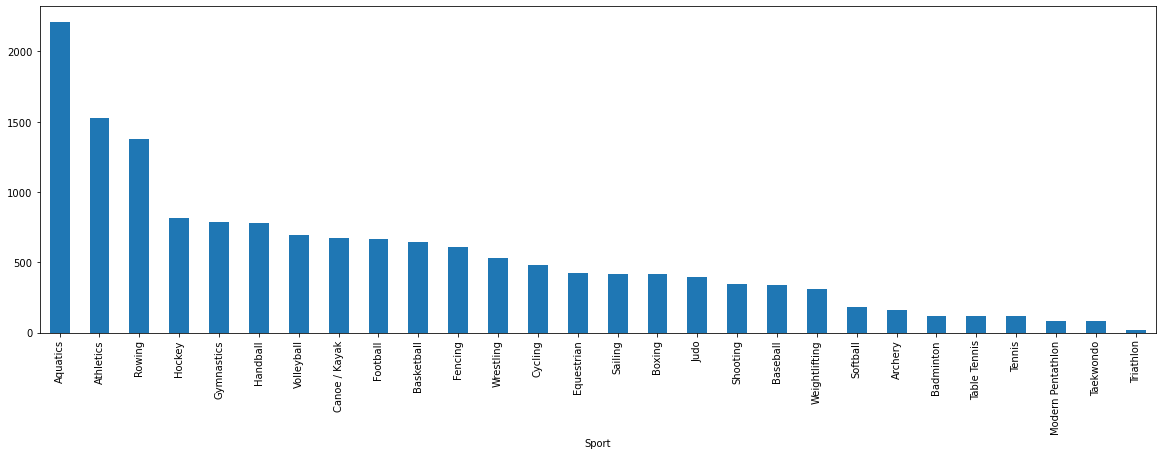

In [19]:
medals_in_sports.plot(kind='bar', figsize=(20,6));

Aquatics and athletics have maximum participation with maximum number of medals in Aquatics with 2210 medals follwed by Athletics with 1523 medals.

Since USA won the most medals, lets explore more for amazing insights...

### USA data Visulatization

In [20]:
usa=df[df['Country']=='United States']
usa

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
5,Montreal,1976.0,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver
7,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze
11,Montreal,1976.0,Aquatics,Diving,3m springboard,"CHANDLER, Jennifer Kay",Women,USA,United States,W,Gold
...,...,...,...,...,...,...,...,...,...,...,...
15314,Beijing,2008.0,Volleyball,Volleyball,volleyball,"SALMON, Riley",Men,USA,United States,M,Gold
15316,Beijing,2008.0,Volleyball,Volleyball,volleyball,"NNAMANI, Ogonna",Women,USA,United States,W,Silver
15380,Beijing,2008.0,Wrestling,Wrestling Free.,- 55kg,"CEJUDO, Henry",Men,USA,United States,M,Gold
15398,Beijing,2008.0,Wrestling,Wrestling Free.,55 - 63kg,"MILLER, Randi",Women,USA,United States,W,Bronze


Question: Which Year won the most medals...?

In [21]:
usa_medal=usa.groupby('Year')['Medal'].count()
usa_medal

Year
1976.0    155
1984.0    333
1988.0    193
1992.0    224
1996.0    260
2000.0    248
2004.0    264
2008.0    315
Name: Medal, dtype: int64

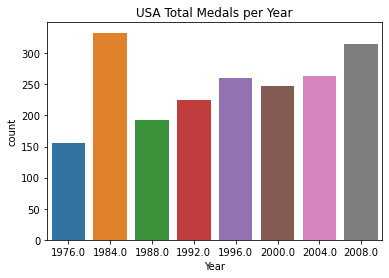

In [22]:
# USA medals by year
usa_medal=df[df.Country_Code=='USA']
sns.countplot(x="Year", data=usa_medal)
plt.title("USA Total Medals per Year")
plt.show();

Maximum number of medals won in year 1984 with 333 medals follwed by year 2008 with 315 medals.

Quesiton: which medals are the most won by the USA team...?

In [23]:
usa_medal_GSB=usa.groupby('Year')['Medal'].value_counts()
usa_medal_GSB

Year    Medal 
1976.0  Gold       63
        Silver     56
        Bronze     36
1984.0  Gold      168
        Silver    115
        Bronze     50
1988.0  Gold       77
        Silver     64
        Bronze     52
1992.0  Gold       89
        Bronze     85
        Silver     50
1996.0  Gold      160
        Bronze     52
        Silver     48
2000.0  Gold      130
        Silver     66
        Bronze     52
2004.0  Gold      116
        Silver     75
        Bronze     73
2008.0  Gold      125
        Silver    109
        Bronze     81
Name: Medal, dtype: int64

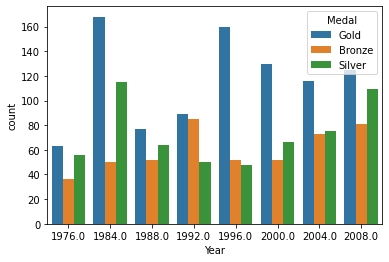

In [24]:
sns.countplot(usa['Year'],hue=usa['Medal']);

Team USA in 1984 won Gold-- 168, Silver--115 which in most and in 1992 bronze-- 85...

Question: which sport won the most medals...?

In [25]:
sports_medals=usa.groupby('Sport')['Medal'].value_counts()
sports_medals

Sport          Medal 
Aquatics       Gold      279
               Silver    197
               Bronze    102
Archery        Gold        8
               Bronze      6
                        ... 
Weightlifting  Silver      2
               Gold        1
Wrestling      Gold       22
               Silver     19
               Bronze     16
Name: Medal, Length: 65, dtype: int64

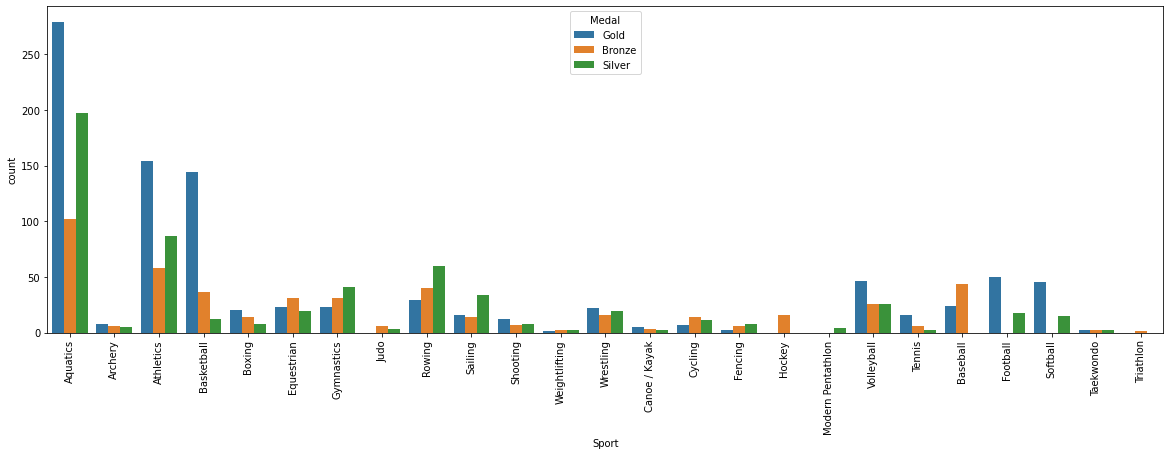

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(usa['Sport'], hue=usa['Medal'])
plt.xticks(rotation=90);

Aquatics with highest number of gold medals follwed by Athletics as large number of participants prefer these sports in USA.

Question: How the progress based on the Gender per olympic Year...?

In [27]:
sports_gender=usa.groupby('Sport')['Gender'].value_counts()
sports_gender

Sport              Gender
Aquatics           Men       290
                   Women     288
Archery            Men        15
                   Women       4
Athletics          Men       189
                   Women     110
Baseball           Men        68
Basketball         Men        96
                   Women      96
Boxing             Men        42
Canoe / Kayak      Men         7
                   Women       3
Cycling            Men        23
                   Women       9
Equestrian         Men        38
                   Women      35
Fencing            Women      11
                   Men         5
Football           Women      68
Gymnastics         Women      64
                   Men        31
Hockey             Women      16
Judo               Men         8
                   Women       1
Modern Pentathlon  Men         3
                   Women       1
Rowing             Men        70
                   Women      59
Sailing            Men        55
                 

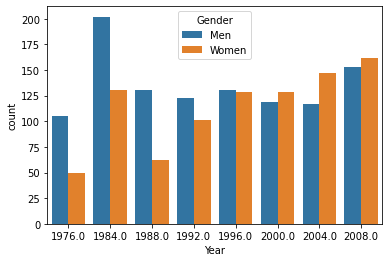

In [28]:
sns.countplot(usa['Year'],hue=usa['Gender']);

This visualization also shows that women participation increases as they are also give preference in participation of sports as time progress. In 2008 it is seen that the participation of women take lead in participation in USA.

Question: What is the participation based on the Gender per olympic Year...?

In [29]:
sports_gender=usa.groupby('Sport')['Gender'].value_counts()
sports_gender

Sport              Gender
Aquatics           Men       290
                   Women     288
Archery            Men        15
                   Women       4
Athletics          Men       189
                   Women     110
Baseball           Men        68
Basketball         Men        96
                   Women      96
Boxing             Men        42
Canoe / Kayak      Men         7
                   Women       3
Cycling            Men        23
                   Women       9
Equestrian         Men        38
                   Women      35
Fencing            Women      11
                   Men         5
Football           Women      68
Gymnastics         Women      64
                   Men        31
Hockey             Women      16
Judo               Men         8
                   Women       1
Modern Pentathlon  Men         3
                   Women       1
Rowing             Men        70
                   Women      59
Sailing            Men        55
                 

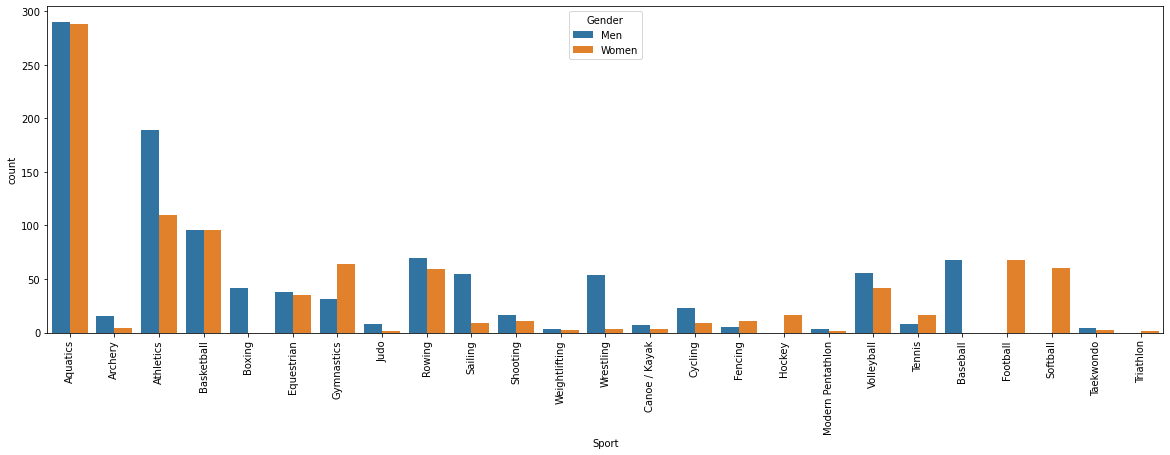

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(usa['Sport'], hue=usa['Gender'])
plt.xticks(rotation=90);

It looks like aquatics has equal participation from men and women. It looks like Aquatics is mostly famous in sports person.

In Conclusion, the USA team is progressing per year and shows the most medals are won in teh year 1992 followed by 2008.

also the participation of women are increasing per year.

Aquatics is the sport which won the most medals...

Lets Explore the performance of India in Olympics...

### India Data Visualization

In [31]:
India=df[df['Country']=='India']
India

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
2288,Moscow,1980.0,Hockey,Hockey,hockey,"SINGH, Singh",Men,IND,India,M,Gold
2289,Moscow,1980.0,Hockey,Hockey,hockey,"FERNANDES, Mervyn",Men,IND,India,M,Gold
2294,Moscow,1980.0,Hockey,Hockey,hockey,"GURMAIL, Singh",Men,IND,India,M,Gold
2302,Moscow,1980.0,Hockey,Hockey,hockey,"BASKARAN, Baskaran",Men,IND,India,M,Gold
2303,Moscow,1980.0,Hockey,Hockey,hockey,"ZAFAR, Zafar",Men,IND,India,M,Gold
2313,Moscow,1980.0,Hockey,Hockey,hockey,"MOHAMMAD, Shahid",Men,IND,India,M,Gold
2320,Moscow,1980.0,Hockey,Hockey,hockey,"SINGH, Singh",Men,IND,India,M,Gold
2339,Moscow,1980.0,Hockey,Hockey,hockey,"KAUSHIK, Maharaj Krishon",Men,IND,India,M,Gold
2341,Moscow,1980.0,Hockey,Hockey,hockey,"SURINDER, Singh",Men,IND,India,M,Gold
2347,Moscow,1980.0,Hockey,Hockey,hockey,"KUMAR, Charanjit",Men,IND,India,M,Gold


Question: Which Year won the most medals...?

In [32]:
india_total_medals=India.groupby('Year')['Medal'].count()
india_total_medals

Year
1980.0    16
1996.0     1
2000.0     1
2004.0     1
2008.0     3
Name: Medal, dtype: int64

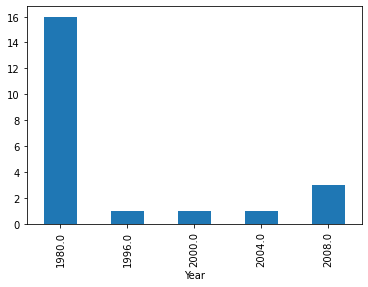

In [33]:
india_total_medals.plot(kind='bar');

India won 16 medals in 1980 and after that 3 medals in 2008.

Quesiton: which medals are the most won by the India team...?

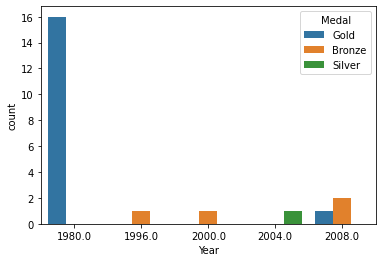

In [34]:
sns.countplot(India['Year'], hue=India['Medal']);

In Year 1980 India won the most gold medals...

Quesiton: Medals won based on Gender in the India team...?

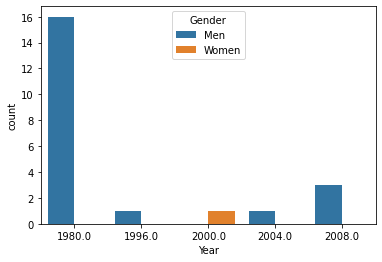

In [35]:
sns.countplot(India['Year'], hue=India['Gender']);

Here we can see that the India team is male dominant and not a significant contribution of women...

Question: Which sport won medals based on Gender....?

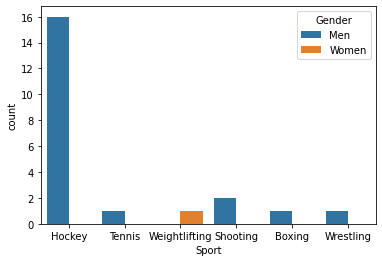

In [36]:
sns.countplot(India['Sport'], hue=India['Gender']);

Mens Hockey team won the most medals, followed by Shooting and Weightlifting which has women contribution...

### Inferences:

As the GDP increases the Medal won by the participating country increase except India...

Participation of women is incresing per year...

Aquatics, athletics, rowing and hockey are the sports with the most medal won...